## Изучение данных из файла

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

df = pd.read_csv('games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Описание данных**
- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
  - 'T'(«Teen») — «Подросткам»
  - 'E'(«Everyone») — «Для всех»
  - 'M'(«Mature») — «Для взрослых»
  - 'E10+'(«Everyone 10 and older») — «Для всех от 10 лет и старше»
  - 'K-A'(«Kids to Adults») — «Для всех», после 1998 был переименован в 'E'
  - 'AO'(«Adults Only 18+») — «Только для взрослых»
  - 'EC'(«Early childhood») — «Для детей младшего возраста»
  - 'RP'(«Rating Pending») — «Рейтинг ожидается»

Данные за 2016 год могут быть неполными.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
print('Пропуски в данных (%)')
round(df.isna().sum() / len(df) * 100, 1) #подсчет пропущенных значений

Пропуски в данных (%)


Name                0.0
Platform            0.0
Year_of_Release     1.6
Genre               0.0
NA_sales            0.0
EU_sales            0.0
JP_sales            0.0
Other_sales         0.0
Critic_Score       51.3
User_Score         40.1
Rating             40.5
dtype: float64

### Вывод 
Таблица содержит данные по каждой игре: платформа, для которой была выпущена игра, год выпуска и жанр, а также данные по продажам и оценкам пользователей и критиков. Можно обратить внимание на названия столбцов, которые для удобства нужно привести к нижнему регистру. В данных с оценками и рейтингом большая доля пропусков, а столбец `User_Score` содержит строковые значения.

## Предобработка данных

In [4]:
df.columns = df.columns.str.lower() #замена регистра в наименовании столбцов
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Удалим строки, где пропуски составляют менее 2%

In [5]:
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['year_of_release'], inplace=True)
df.dropna(subset=['genre'], inplace=True)

Заменим тип даныхх в столбце `year_of_release` на целочисленный

In [6]:
df['year_of_release'] = df['year_of_release'].astype('int')

Проверим содержание столбца `user_score`, для этого выведем уникальные значения столбца с подсчетом их упоминаний

In [7]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.3       2
1.9       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

В столбце есть строки со значением "tbd" ("to be determined"). Предположим, что нет полных данных по оценкам пользователей за текущий 2016 год

In [8]:
df.loc[df['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


Вероятно не все данные были заполнены корректно. Чтобы сделать данные столбца доступными для расчетов, заменим значение "tbd" на тип 'Nan'

In [9]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')

Для корректной оценки влияния рейтинга ESRB на продажи заменим пропуски в столбце `rating` значением 'Unknown'

In [10]:
df.loc[df['rating'].isna(), 'rating'] = 'Unknown'

In [11]:
print('Пропуски в данных (%)')
round(df.isna().sum() / len(df) * 100, 1) #подсчет пропущенных значений

Пропуски в данных (%)


name                0.0
platform            0.0
year_of_release     0.0
genre               0.0
na_sales            0.0
eu_sales            0.0
jp_sales            0.0
other_sales         0.0
critic_score       51.5
user_score         54.6
rating              0.0
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


Так как тип данных в столбце не изменился, заменим строковые значения в столбце на вещественные с помощью метода `to_numeric`

In [13]:
df['user_score'] = pd.to_numeric(df['user_score'])

Добавим в таблицу новый столбец с общей суммой продаж

In [14]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


Посмотрим описание значений таблицы

In [15]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


В работе даные за 1980-2016 гг. В столбцах с продажами есть выбросы, значительно превышающие медианное значение продаж, а также нулевые значения, которые, вероятно, означают, что не все игры выпускались по всему миру.

### Вывод

В результате предобработки данных наименования столбцов были приведены к нижнему регистру, строки с незначительным количеством пропусков были удалены. Тип данных в столбце с годом релиза был заменен на целочисленный, а в столбце с оценками пользователей на вещественный, значения "tbd" были замененены на 'Nan'. В таблицу добавлен новый столбец с общей суммой продаж

## Исследовательский анализ данных

### Анализ продаж в зависимости от года выпуска игры

Сгруппируем общие продажи по названию игры и году выпуска 

In [16]:
pivot = df.groupby(['year_of_release','name']).agg({'total_sales': 'sum'}).reset_index().sort_values(by='year_of_release')
pivot.head()

,year_of_release,name,total_sales
0,1980,Asteroids,4.31
1,1980,Boxing,0.77
2,1980,Bridge,0.27
3,1980,Checkers,0.23
4,1980,Defender,1.05


Чтобы определиться с актуальным периодом для анализа, создадим таблицу с количеством выпущенных игр и продажами по годам и построим линейный график

In [17]:
sales_by_game_year = pivot.groupby(['year_of_release']).agg({'name': 'count', 'total_sales': 'sum'})
sales_by_game_year.head()

,name,total_sales
year_of_release,,
1980,9,11.38
1981,46,35.68
1982,36,28.88
1983,17,16.80
1984,14,50.35


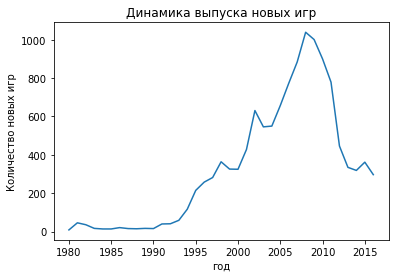

In [18]:
sales_by_game_year['name'].plot(kind='line', title='Динамика выпуска новых игр')
plt.xlabel('год')
plt.ylabel('Количество новых игр')
plt.show()

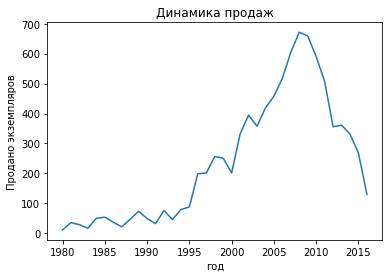

In [19]:
sales_by_game_year['total_sales'].plot(kind='line', title='Динамика продаж')
plt.xlabel('год')
plt.ylabel('Продано экземпляров')
plt.show()

Графики показывают, что рост популярности игровой индустрии началася в 1995, поэтому исключим из таблицы данные за более ранние периоды

In [20]:
df = df.query('year_of_release > 1995')

### Анализ продаж по платформам

Для анализа выделим 10 платформ по наибольшему количеству проданных копий

In [21]:
platform_top = df.pivot_table(index='platform', 
                              values='total_sales', 
                              aggfunc='sum').sort_values(by='total_sales', 
                                                         ascending=False)
platform_top = platform_top.iloc[:10]
platform_top_list = platform_top.index
platform_top

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,685.59
PS4,314.14
GBA,312.88
PSP,289.53


In [22]:
print('Всего платформ:', len(df['platform'].unique()))

Всего платформ: 24


Посмотрим общие данные по самым популярным платформам

In [23]:
platform_total_sales = df.pivot_table(index='year_of_release', 
                                      columns='platform', 
                                      values='total_sales', 
                                      aggfunc='sum')

In [24]:
platform_total_sales[platform_top_list].describe()

platform,PS2,X360,PS3,Wii,DS,PS,PS4,GBA,PSP,3DS
count,12.000000,12.000000,11.000000,11.000000,10.000000,8.000000,4.000000,8.000000,12.000000,6.000000
mean,102.796667,80.103333,84.667273,81.016364,80.276000,85.698750,78.535000,39.110000,24.127500,42.968333
std,79.405729,57.484408,54.637565,79.136330,59.796231,64.336762,40.567917,32.768255,20.190759,18.278261
min,0.450000,1.520000,3.600000,0.180000,1.540000,2.070000,25.990000,0.070000,0.120000,15.140000
25%,35.977500,29.045000,34.360000,6.170000,19.497500,28.360000,58.435000,4.810000,6.080000,31.775000
50%,89.705000,91.995000,107.360000,59.650000,102.280000,95.535000,84.625000,45.265000,26.185000,47.560000
75%,170.900000,124.032500,124.725000,144.960000,127.557500,138.260000,104.725000,64.687500,39.295000,55.267500
max,211.810000,170.030000,156.780000,206.970000,146.940000,169.490000,118.900000,77.910000,55.320000,63.200000


По описанию можно сделать вывод, что в среднем платформа существует около 10 лет. Оставим в таблице актуальные данные не позже 2007 года

In [25]:
actual_data = df.query('year_of_release > 2006')
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9327 entries, 2 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             9327 non-null   object 
 1   platform         9327 non-null   object 
 2   year_of_release  9327 non-null   int32  
 3   genre            9327 non-null   object 
 4   na_sales         9327 non-null   float64
 5   eu_sales         9327 non-null   float64
 6   jp_sales         9327 non-null   float64
 7   other_sales      9327 non-null   float64
 8   critic_score     4370 non-null   float64
 9   user_score       4403 non-null   float64
 10  rating           9327 non-null   object 
 11  total_sales      9327 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 910.8+ KB


Выделим топ-10 актуальных платформ и построим график динамики продаж

In [26]:
platform_top = actual_data.pivot_table(index='platform', 
                              values='total_sales', 
                              aggfunc='sum').sort_values(by='total_sales', 
                                                         ascending=False)
platform_top = platform_top.iloc[:10]
platform_top_list = platform_top.index
platform_top

,total_sales
platform,
PS3,910.38
X360,901.37
Wii,754.03
DS,535.54
PS4,314.14
3DS,257.81
PSP,183.31
PS2,162.38
PC,160.57


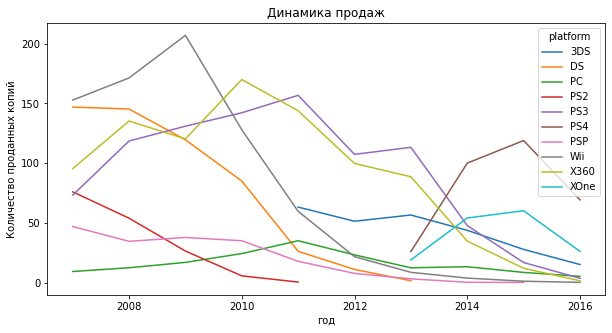

In [27]:
actual_platforms = actual_data.query('platform in @platform_top_list')
actual_platforms.pivot_table(index='year_of_release', 
                             columns='platform', 
                             values='total_sales', 
                             aggfunc='sum').plot(kind='line', 
                                                 legend=True, 
                                                 title='Динамика продаж', 
                                                 figsize=(10,5))
plt.xlabel('год')
plt.ylabel('Количество проданных копий')
plt.show()

График показывает, что для некоторых платформ игры уже не продаются. Самые высокие продажи в течение первых 5-6 лет существования платформы. Продажи по всем платформам упали к 2016 г., что может быть обусловлено неполнотой данных за текущий год.Потенциально прибыльными платформами могут быть "XOne", "PS4" и "3DS", т.к. в течение последних лет продажи по остальным платформам только падали

Рассмотрим данные за годы существования этих платформ и построим диаграмму размаха за период с 2011 года

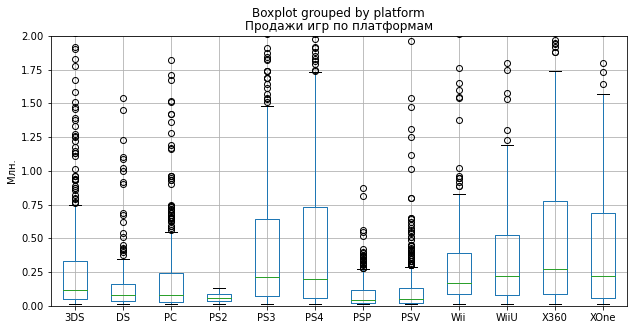

In [28]:
actual_data = actual_data.query('year_of_release >= 2011')
actual_data.boxplot(column = 'total_sales', by = 'platform', figsize=(10,5))
plt.ylim(0, 2)
plt.title('Продажи игр по платформам')
plt.xlabel(None)
plt.ylabel('Млн.')
plt.show()

Наибольшее количество игр было продано на платформах PS3, PS4 и X360, XOne. Динамика продаж показывает что в разные годы игры на платформах PS3 и X360, PS4 и XOne выходили в одно время. Эти платформы выделяются большим объемом продаж. Медианная величина продаж на платформе X360 превышает PS3, а на платформе XOne чуть больше, чем на PS4. 3DS выделяется большим количеством выбросов, когда игры на этой платформе становились хитами.

Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграммы размаха и посчитаем корреляцию общих продаж с другими показателями

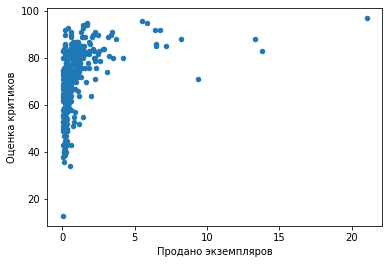

In [29]:
actual_data.query('platform == "PS3"').plot(x='total_sales', y='critic_score', kind='scatter')
plt.xlabel('Продано экземпляров')
plt.ylabel('Оценка критиков')
plt.show()

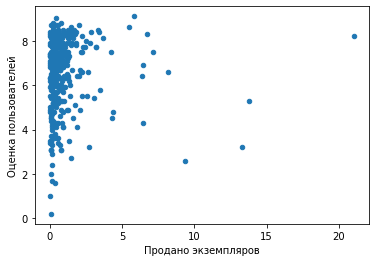

In [30]:
actual_data.query('platform == "PS3"').plot(x='total_sales', y='user_score', kind='scatter')
plt.xlabel('Продано экземпляров')
plt.ylabel('Оценка пользователей')
plt.show()

In [31]:
actual_data.query('platform == "PS3"').corr()['total_sales']

year_of_release   -0.123980
na_sales           0.937887
eu_sales           0.968964
jp_sales           0.438093
other_sales        0.978086
critic_score       0.380111
user_score         0.014089
total_sales        1.000000
Name: total_sales, dtype: float64

Корреляция с оценками критиков в 0,38 говорит о наличии связи, но не слишком сильной. Можно сделать вывод, что продажи игр растут с оценкой критиков. Еще меньше на продажи влияет оценка пользователей. Сравним полученный результат с продажами по всем платформам

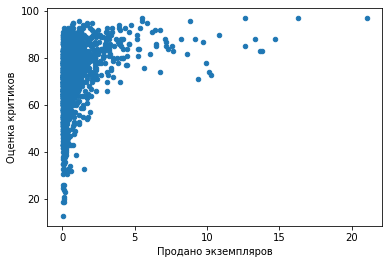

In [32]:
actual_data.plot(x='total_sales', y='critic_score', kind='scatter')
plt.xlabel('Продано экземпляров')
plt.ylabel('Оценка критиков')
plt.show()

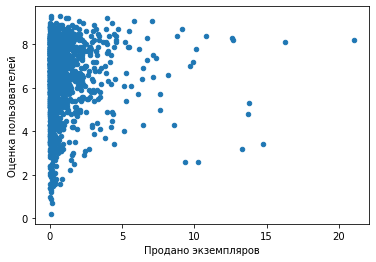

In [33]:
actual_data.plot(x='total_sales', y='user_score', kind='scatter')
plt.xlabel('Продано экземпляров')
plt.ylabel('Оценка пользователей')
plt.show()

In [34]:
actual_data.corr()['total_sales']

year_of_release   -0.033917
na_sales           0.927913
eu_sales           0.931263
jp_sales           0.446631
other_sales        0.915012
critic_score       0.329977
user_score         0.031636
total_sales        1.000000
Name: total_sales, dtype: float64

Если рассматривать все платформы, то можно сказать, что продажи не зависят от оценки пользователей, незначительно влияет лишь оценка критиков

### Анализ продаж по жанрам

Рассмотрим распределение проданных игр по жанрам

In [35]:
genre_sales = actual_data.groupby('genre').agg({'total_sales':'sum'})
genre_sales.columns = ['sum']
genre_sales = genre_sales.reset_index().sort_values(by='sum', ascending=False)
genre_sales

,genre,sum
0,Action,557.80
8,Shooter,402.91
7,Role-Playing,245.63
10,Sports,237.15
3,Misc,139.42
4,Platform,88.68
6,Racing,88.31
2,Fighting,66.90
9,Simulation,50.26
1,Adventure,45.04


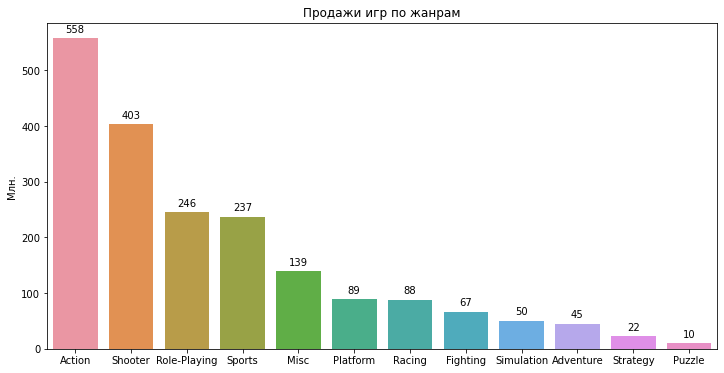

In [36]:
genre_sales.sort_values(by='sum', ascending=False)
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=genre_sales, x='genre', y='sum')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.xlabel(None)
plt.ylabel('Млн.')
plt.title('Продажи игр по жанрам')
plt.show()

По общему объему продаж лидирует "Action". Также можно выделить как потенциально прибыльные "Shooter", "Role-playing" и "Sports". Построим диаграмму размаха общих продаж по жанрам

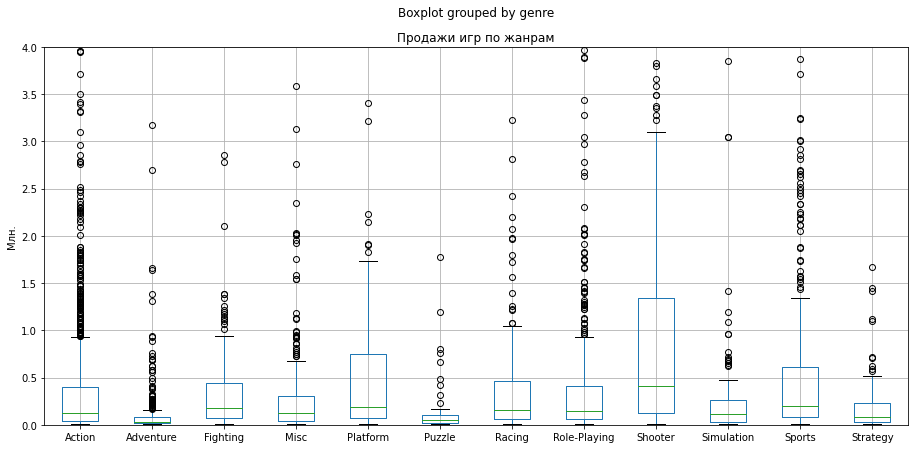

In [37]:
actual_data.boxplot(column = 'total_sales', by = 'genre', figsize=(15, 7))

plt.ylim(0, 4)
plt.title('Продажи игр по жанрам')
plt.xlabel(None)
plt.ylabel('Млн.')
plt.show()

Диаграмма размаха показывает, что большое количество проданных игр в жанре "Action" получилось за счет единичных игр-хитов. Среди наиболее прибыльных по медиане продаж можно выделить "Shooter". Небольшое количество выбросов и значительный объем продаж говорит о популярности игр в этом жанре

### Анализ продаж по регионам

Для анализа продаж по регионам построим рассмотрим продажи игр по платформам, по жанрам и рассмотрим как влияет рейтинг ESRB на продажи в каждом регионе

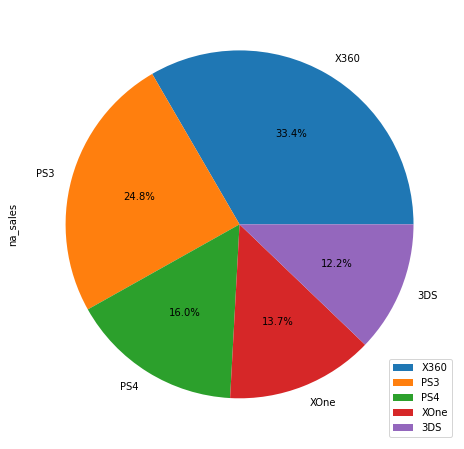

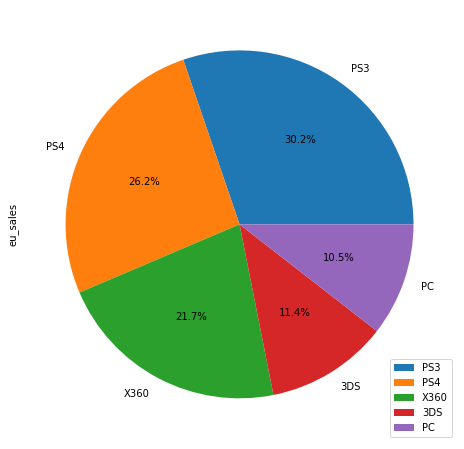

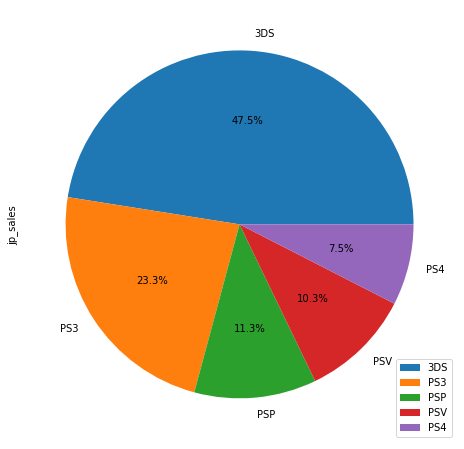

In [38]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
for column in columns:
    #platform = actual_platforms.pivot_table(index='platform', 
                                  #values=column, 
                                  #aggfunc='sum').sort_values(by=column, 
                                                         #ascending=False)
    
    platform = actual_data.pivot_table(index='platform', 
                                  values=column, 
                                  aggfunc='sum').sort_values(by=column, 
                                                         ascending=False)
    platform = platform.loc[platform[column] != 0]
    platform = platform.iloc[:5]

    platform.plot(kind='pie', y=column, autopct='%1.1f%%', figsize=(8, 8))
    plt.show()

По круговым диаграммам можно сделать вывод, что за последние годы самые большие продажи игр в Северной Америке были на платформах PS3 и X360. Это обусловлено тем, что эти платформы давно на рынке. Из современных XOne, PS4, 3DS лидирует по продажам PS4, но, учитывая, что данные за 2016 год неполные, для рекламных кампаний этого региона, можно взять во внимание и XOne. Так как 3DS на рынке на два года дольше, можно сделать вывод, что она значительно уступает по продажам. Если рассматривать продажи в Европе, то по опыту прошлых лет Play Station пользуется большей популярностью у европейцев, чем Xbox, а современная XOne здесь даже не вошла в пятерку популярных платформ. На японском рынке лидирует 3DS, продажи игр на которой в два раза превысили продажи на PS3, которая существует значительно дольше.

Рассмотрим продажи игр по жанрам в разных регионах

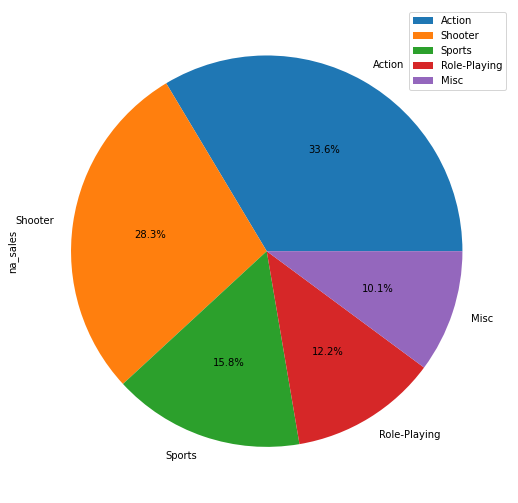

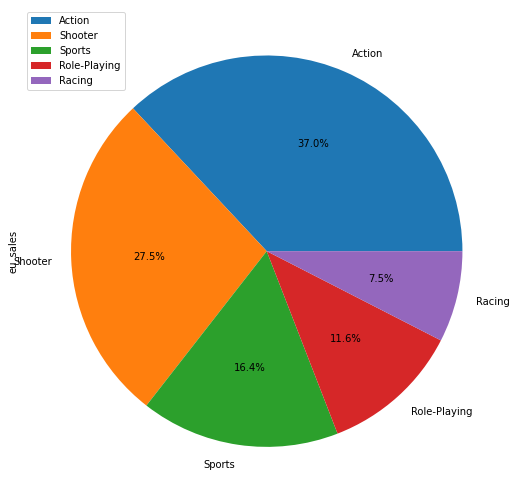

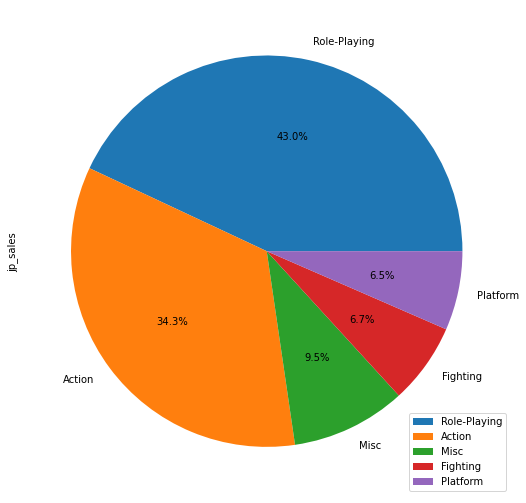

In [39]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
for column in columns:
    #genre = actual_platforms.pivot_table(index='genre', 
                                  #values=column, 
                                  #aggfunc='sum').sort_values(by=column, 
                                                         #ascending=False)
    
    genre = actual_data.pivot_table(index='genre', 
                                  values=column, 
                                  aggfunc='sum').sort_values(by=column, 
                                                         ascending=False)
    genre = genre.loc[genre[column] != 0]
    genre = genre.iloc[:5]
    genre.plot(kind='pie', y=column, autopct='%1.1f%%', figsize=(9, 9))
    plt.show()

Во всех регионах большой популярностью пользуются игры "Action". В Японии наиболее популярны "Role-playing" игры, а остальные жанры составляют незначительную долю продаж. Для рынков Северное Америки и Европы также потенциально прибыльными могут быть игры жанров "Sports" и "Shooter"

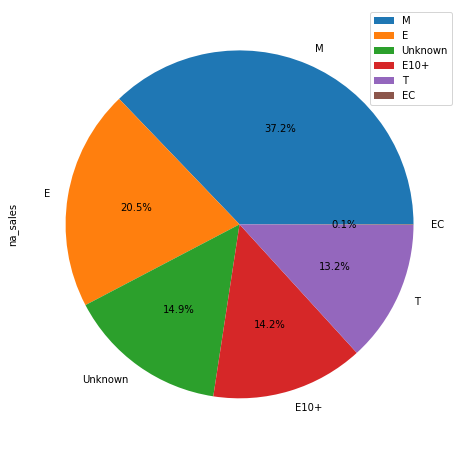

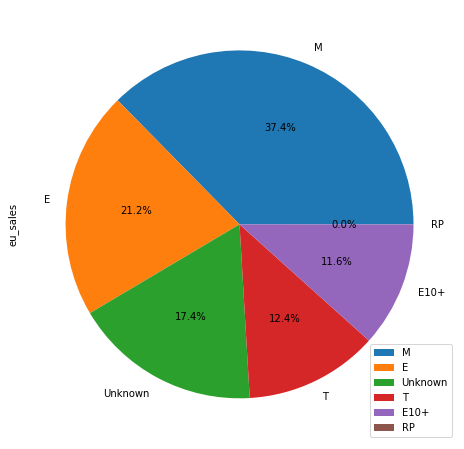

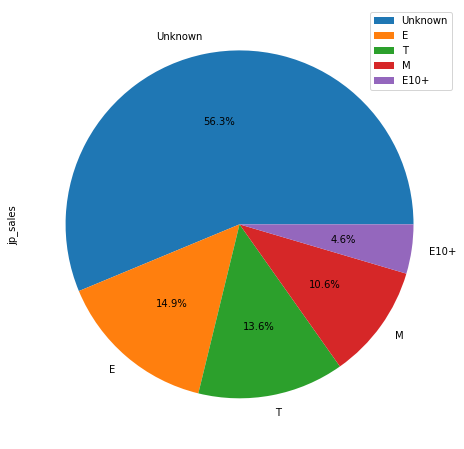

In [40]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
for column in columns:
    #rating = actual_platforms.pivot_table(index='rating', 
                                  #values=column, 
                                  #aggfunc='sum').sort_values(by=column, 
                                                         #ascending=False)
    rating = actual_data.pivot_table(index='rating', 
                                  values=column, 
                                  aggfunc='sum').sort_values(by=column, 
                                                         ascending=False)
    rating = rating.loc[rating[column] != 0]

    rating.plot(kind='pie', y=column, autopct='%1.1f%%', figsize=(8, 8))
    plt.show()

В Европе и Северной Америке распределение продаж по жанрам примерно схожее. Преимущественно продаются игры "для взрослых" и "для всех", и меньше продаж у игр "подросткам" и "для всех от 10 лет и старше".
По продажам игр в Японии основная часть данных по жанрам отсутствует. ESRB работает только на территории СА, в Японии есть аналогичная организация: CERO. Вероятно, ESRB не присваивают рейтинги иностранным играм, поскольку на них уже есть маркировка, либо текущая таблица - это объединенные данные продаж восточного и западного рынка

### Вывод

Исследовательский анализ данных показал, что пик популярности игр пришелся на 2007-2012 гг, затем продажи пошли на спад. В среднем платформа существует около 10 лет, а наиболее высокий доход приносит в течение первых 5-6 лет, поэтому дальнейший анализ проводился по данным начиная с 2011 года. Потенциально прибыльными платформами могут быть последние "XOne", "PS4" и "3DS", а потенциально популярными жанрами "Action", "Shooter", "Sports" и "Role_playing".

## Проверка гипотез

Проверим одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC и отличаются ли средние пользовательские рейтинги жанров Action  и Sports. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, избавимся от пропусков в столбце `user_score` и используем критерий Стьдента для независимых выборок. Оставим параметр `equal_var = True`, т.к. выборки взяты из схожих по параметрам совокупностей. В виду того, что разброс значений пользовательских оценок небольшой, применим критический уровень статистической значимости 0,01

- H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Н1 - Средние рейтинги различаются


In [41]:
xone = actual_data.query('platform == "XOne"')
xone = xone.loc[~xone['user_score'].isna()]

pc = actual_data.query('platform == "PC"')
pc = pc.loc[~pc['user_score'].isna()]



In [42]:
alpha = 0.01  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(xone['user_score'], pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.6267602271422398
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средняя оценка игр на выбранных платформах и неодинакова, это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами. 

- Н0 - Средние пользовательские рейтинги жанров Action  и Sports одинаковые. Н1 - Средние рейтинги различаются

In [43]:
action = actual_data.query('genre == "Action"')
action = action.loc[~action['user_score'].isna()]

sports = actual_data.query('genre == "Sports"')
sports = sports.loc[~sports['user_score'].isna()]

alpha = 0.01  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(action['user_score'], sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.1974550252152054e-24
Отвергаем нулевую гипотезу


Вероятность низка — по наблюдаемым данным можно сделать вывод, что, скорее всего, средние рейтинги этих жанров все-таки различаются

### Вывод

Проверка гипотез показала, что скорее всего, средняя оценка игр жанров Action и Sports различается, а рейтинг игр среди пользователей платформ Xbox One и PC скорее всего одинаков

## Вывод

За последние годы самыми популярными в Европе и Америке являются платформы Xbox и Play Station, а в Японии 3DS.  Потенциально прибыльними жанрами по медиане продаж можно считать жанры "Shooter" и "Sports", а игры жанра "Action" часто становятся хитами. В разных регионах следует планировать разные кампании. 
Игроки Северной Америки играют как на PS, так и на и Xbox. Предпочитают жанры "Action", "Shooter" и "Sports", как и европейцы, но по данным последних лет в Европе большей популярностью пользуются игры на PS. Основную часть продаж в этих регионах составляют игры "для взрослых" и "для всех". Рынок игр в Японии значительно отличается. Здесь пользователи предпочитают  "Action" и "Role-Playing" на 3DS.

Можно предположить, что для пользователей Северной Америки в 2017 году будут интересны игры:
- жанр: "Action", "Shooter" и "Sports"
- платформа: PS4 и XOne
- рейтинг "для взрослых" и "для всех"

для пользователей Европы:
- жанр: "Action", "Shooter" и "Sports"
- платформа: PS4 
- рейтинг "для взрослых" и "для всех"

для пользователей Японии:
- жанр: "Action" и "Role-Playing"
- платформа: 3DS 